<a href="https://colab.research.google.com/github/raulrosapacheco/Campanhas-Telemarketing-Financeiras/blob/main/MarketingFinanceira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados de Campanhas de Marketing Direto (Instituição Bancária)

## Carregando os Pacotes

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carregando os Dados

In [2]:
# Carrega o DataSet bank-full.csv disponível no GitHub
df = pd.read_csv('https://raw.githubusercontent.com/raulrosapacheco/Campanhas-Telemarketing-Financeiras/main/dados/bank-full.csv', sep=';')

In [3]:
# Número de Registros e Variáveis
df.shape

(45211, 16)

In [4]:
# Amostra do DataSet
df.head()

,"job,age",education,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,"management,58",tertiary,married,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,"technician,44",secondary,single,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,"entrepreneur,33",secondary,married,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,"blue-collar,47",unknown,married,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,"unknown,33",unknown,single,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Análise Exploratória

In [5]:
# Verificar os tipos de dados das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job,age    45211 non-null  object
 1   education  45211 non-null  object
 2   marital    45211 non-null  object
 3   default    45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   loan       45211 non-null  object
 7   contact    45211 non-null  object
 8   day        45211 non-null  int64 
 9   month      45171 non-null  object
 10  duration   45211 non-null  int64 
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  poutcome   45211 non-null  object
 15  y          45193 non-null  object
dtypes: int64(6), object(10)
memory usage: 5.5+ MB


In [6]:
# Quantidade de valores nulos
df.isna().sum()

job,age       0
education     0
marital       0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month        40
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
y            18
dtype: int64

Já é possível identificar que a coluna job,age possuem duas informações, portanto é necessário separá-las.

In [7]:
# Separando a coluna 'job,age'
df[['job', 'age']] = df['job,age'].str.split(',', expand=True)
df = df.drop(columns=['job,age'], axis =1)

# Deletando espaços em branco das colunas 'job' e 'age'
df['job'] = df['job'].apply(lambda x: x.strip())
df['age'] = df['age'].apply(lambda x: x.strip())

# Substitua valores vazios por NaN
df['job'].replace('', np.nan, inplace=True)
df['age'].replace('', np.nan, inplace=True)

# Reordenar coluna
new_order = ['job', 'age', 'education', 'marital', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
df = df.reindex(columns=new_order)

# Amostra
df.head()

,job,age,education,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,management,58,tertiary,married,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,technician,44,secondary,single,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,entrepreneur,33,secondary,married,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,blue-collar,47,unknown,married,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,unknown,33,unknown,single,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
# Verificando novamente a quantidade de valores nulos após a divisão
df.isna().sum()

job           0
age          15
education     0
marital       0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month        40
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
y            18
dtype: int64

## Tratamento de Valores Ausentes da Variável 'age'

In [9]:
# Valores únicos e tipologia 
df['age'].unique()

array(['58', '44', '33', '47', '35', '28', '42', '43', '41', '29', '53',
       '57', '51', '45', '60', '56', '32', '25', '40', '39', '52', '46',
       '36', nan, '55', '54', '48', '24', '38', '49', '59', '31', '30',
       '27', '34', '23', '37', '26', '50', '61', '22', '0', '21', '20',
       '66', '62', '83', '75', '67', '70', '65', '68', '64', '69', '72',
       '71', '19', '76', '85', '63', '90', '82', '73', '74', '78', '80',
       '94', '79', '77', '86', '95', '81', '18', '89', '84', '87', '92',
       '93', '88'], dtype=object)

É possível observar que na coluna 'age' (idade), além dos valores nulos existem registros com idade igual a '0'.

Existe cliente bancário com idade igual a '0'?

Portanto iremos transformar todos os registros com idade igual a '0' para valores nulos.

In [17]:
# Transformando idade igual a zero para valor nulo
df['age'] = df['age'].replace(0, np.nan)

In [11]:
# Mudar o tipo da coluna 'age' para int
df['age'] = df['age'].astype(float).fillna(float('nan')).astype('Int64')

In [24]:
# Verificando percentual de valores ausentes
df['age'].isna().mean() * 100

0.05529627745460176

O percentual de valores ausentes da coluna 'age' é muito baixo. Seria viável eliminar os registros com valores ausentes ou aplicar imputação. Irei optar por aplicar imputação por uma das medidas de tendência central.

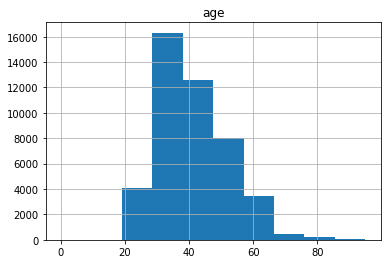

In [13]:
# Criar um histograma da coluna "age"
df.hist(column='age')
plt.show()

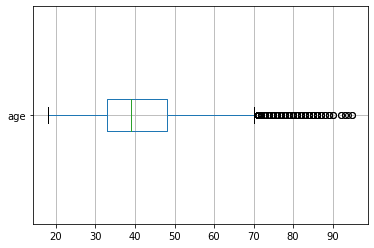

In [19]:
# Criar um boxplot da coluna "age"
df.boxplot(column='age', vert=False)
plt.show()

In [18]:
df['age'].unique()

<IntegerArray>
[  58,   44,   33,   47,   35,   28,   42,   43,   41,   29,   53,   57,   51,
   45,   60,   56,   32,   25,   40,   39,   52,   46,   36, <NA>,   55,   54,
   48,   24,   38,   49,   59,   31,   30,   27,   34,   23,   37,   26,   50,
   61,   22,   21,   20,   66,   62,   83,   75,   67,   70,   65,   68,   64,
   69,   72,   71,   19,   76,   85,   63,   90,   82,   73,   74,   78,   80,
   94,   79,   77,   86,   95,   81,   18,   89,   84,   87,   92,   93,   88]
Length: 78, dtype: Int64

Analisando o histograma e o boxplot da variável 'age' é possivel perceber uma assimetria nos dados e diversos valores outliers. 

In [20]:
# Calcular a média da coluna 'age'
media = df['age'].mean()

# calcular a mediana da coluna 'B'
mediana = df['age'].median()

# calcular a moda da coluna 'B'
moda = df['age'].mode()[0]

# imprimir os resultados
print(f"Média: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")

Média: 40.933054485902716
Mediana: 39.0
Moda: 32


In [26]:
# Verificando percentual de valores ausentes
df['age'].isna().mean() * 100

0.0

Os dados parecem assimetricos, sendo assim a média não deveria ser usada, além disse a moda está muito abaixo da media e da mediana. Se imputar a moda, estaria reforçando essa informação.

Portanto, os valores ausentes da variáveis 'age' serão preenchidos pela mediana.

In [29]:
# Preencher os valores ausentes da coluna 'age' com a moda
df['age'].fillna(mediana, inplace=True)

## Tratamento de Valores Ausentes da Variável 'month'

In [21]:
# Quantidade de valores ausentes da coluna 'month'
df['month'].isnull().sum()

40

In [23]:
# Percentual de valores ausentes da coluna 'month'
df['month'].isnull().mean() * 100

0.0884740439273628

Por decisão de negócio, irei preencher os valores ausentes da variável 'month' com a moda. 

A variável month é do tipo categórica, portanto não existe cálculo de média e mediana para variáveis categóricas.

In [27]:
# calcular a moda da coluna 'month'
moda = df['month'].mode()[0]

# preencher os valores ausentes da coluna 'B' com a moda
df['month'].fillna(moda, inplace=True)

In [28]:
# Percentual de valores ausentes da coluna 'month'
df['month'].isnull().mean() * 100

0.0

## Tratamento de Valores Ausentes da Variável 'y' (variável alvo)
Essa variável indica se o cliente aderiu ou não ao produto bancário.

In [31]:
# Quantidade de valores ausentes da variável alvo
df['y'].isnull().sum()

18

In [32]:
# Percentual de valores ausentes da variável alvo
df['y'].isnull().mean() * 100

0.03981331976731326

Não se aplica técnicas de imputação em uma variável alvo, o mais indicado neste caso é deletar os registros que contém valor ausente na variável alvo.

In [33]:
# Deletar os registros que contêm valor ausente na coluna 'y'
df = df.dropna(subset=['y'])

In [34]:
# Quantidade de valores ausentes da variável alvo
df['y'].isnull().sum()

0

## Tratamento de Valores Ausentes da Variável 'pdays'
O dicionário de dados informa que nesta colunas, valores -1 indicam valores ausentes.

In [35]:
# Substituir os valores -1 da coluna 'pdays' por NaN
df['pdays'] = df['pdays'].replace(-1, np.nan)

In [36]:
# Percentual de valores ausentes na coluna 'pdays'
df['pdays'].isna().mean() * 100

81.7294713783108

A coluna 'pdays' possui quase 82% de valores ausentes, portando é indicado deletar a coluna da análise.

In [37]:
# Dropar a coluna 'pdays'
df = df.drop('pdays', axis=1)